# **Importing Libraies**

In [26]:
import numpy as np
import pandas as pd
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# **Step 1: Data Preparation**

In [17]:

data = pd.read_csv('/content/spam.csv', encoding='latin-1', usecols=['v1', 'v2'])

print(data['v1'].unique())

data.columns = ['label', 'message']

print(data.head())
print("Number of missing values in 'v1' column:", data['label'].isnull().sum())



['ham' 'spam']
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
Number of missing values in 'v1' column: 0


# **Step 2: Data Preprocessing**


In [18]:

data['label'] = data['label'].map({'ham': 0, 'spam': 1})


def clean_message(msg):
    msg = msg.lower()
    msg = ''.join([char for char in msg if char not in string.punctuation])
    return msg

data['message'] = data['message'].apply(clean_message)

print(data.head())

   label                                            message
0      0  go until jurong point crazy available only in ...
1      0                            ok lar joking wif u oni
2      1  free entry in 2 a wkly comp to win fa cup fina...
3      0        u dun say so early hor u c already then say
4      0  nah i dont think he goes to usf he lives aroun...


# **Step 3: Feature Extraction**

In [19]:
vectorizer = TfidfVectorizer(stop_words='english')

X = vectorizer.fit_transform(data['message'])
y = data['label']
print(X.shape)

(5572, 9222)


# **Step 4: Model Training**

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)

model = MultinomialNB()

model.fit(X_train, y_train)

(4457, 9222) (1115, 9222)


MultinomialNB()

# **Step 5: Model Evaluation**

In [21]:
y_pred = model.predict(X_test)


print(classification_report(y_test, y_pred))


print('Accuracy:', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.76      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115

Accuracy: 0.967713004484305


# **Step 6: Counting Spam and Original Messages**

In [22]:
print("\nMessage Classification Results:\n")

spam_count = sum(y_pred)
ham_count = len(y_pred) - spam_count

print("Number of spam messages:", spam_count)
print("Number of non-spam messages (original):", ham_count)



Message Classification Results:

Number of spam messages: 114
Number of non-spam messages (original): 1001


# **Visualizations**

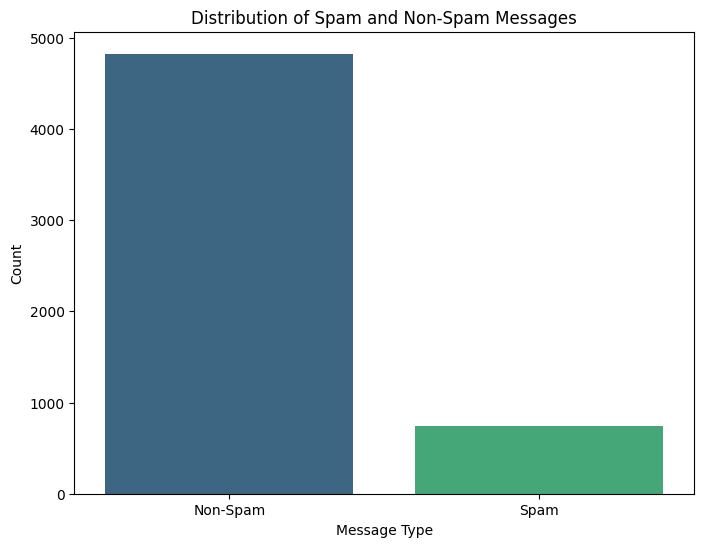

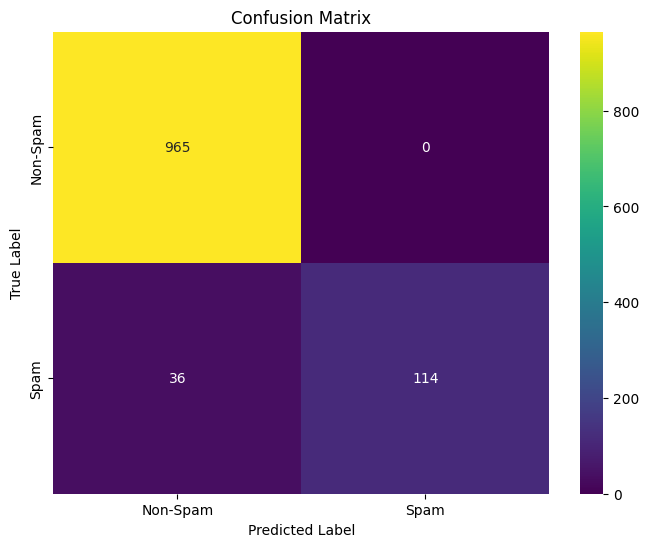

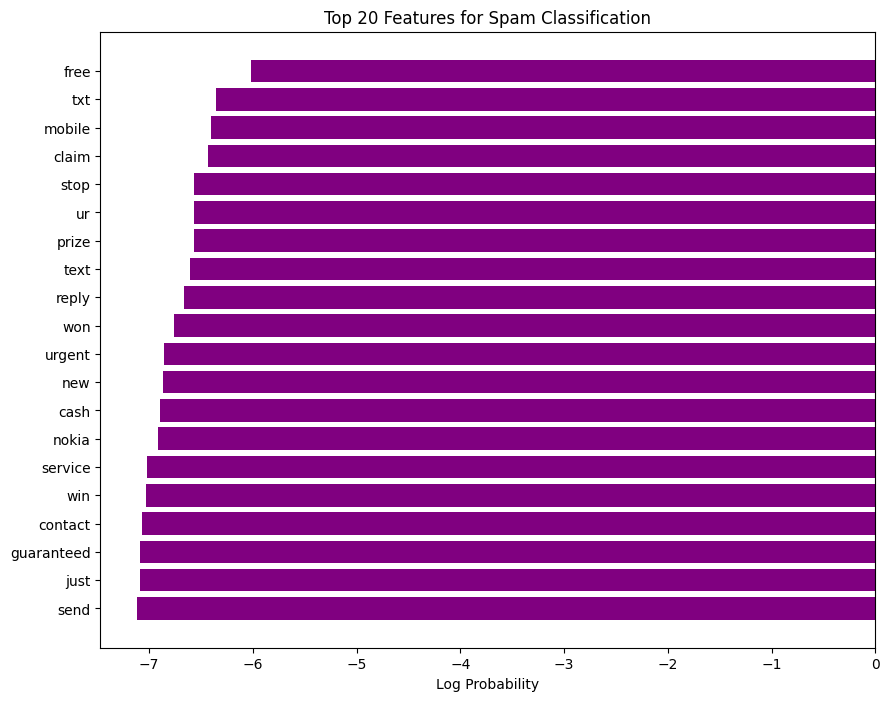

In [31]:
# Visualizing the distribution of spam and non-spam messages
plt.figure(figsize=(8, 6))

sns.countplot(x=data['label'], hue=data['label'], palette='viridis', legend=False)

plt.title('Distribution of Spam and Non-Spam Messages')
plt.xticks(ticks=[0, 1], labels=['Non-Spam', 'Spam'])
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.show()

# Visualizing the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', xticklabels=['Non-Spam', 'Spam'], yticklabels=['Non-Spam', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Visualizing feature importance (Top 20 features) for MultinomialNB
feature_names = np.array(vectorizer.get_feature_names_out())
sorted_indices = np.argsort(model.feature_log_prob_[1])[-20:]

plt.figure(figsize=(10, 8))
plt.barh(feature_names[sorted_indices], model.feature_log_prob_[1][sorted_indices], color='purple')
plt.title('Top 20 Features for Spam Classification')
plt.xlabel('Log Probability')
plt.show()